 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
# whale_returns.describe()
whale_returns.sort_index(ascending = True, inplace = True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
print(whale_returns.isnull().sum())
print(whale_returns[whale_returns.isnull().any(axis = 1)])

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64
            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  


In [4]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(ascending = True, inplace = True)
algo_returns.head(100)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2014-10-10,-0.012612,-0.011752
2014-10-13,-0.018528,-0.002009
2014-10-14,0.000702,0.004501


In [6]:
# Count nulls
algo_returns.isnull().sum()
# drop nulls
algo_returns.dropna(inplace = True)
algo_returns.head()




,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [7]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_cvs = Path("Resources/sp_tsx_history.csv")
sp_tsx_history = pd.read_csv(sp_tsx_history_cvs, index_col="Date", parse_dates=True, infer_datetime_format=True)
# whale_returns.describe()
sp_tsx_history.sort_index(ascending = True, inplace = True)
sp_tsx_history.head()


,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [8]:
# Check Data Types
sp_tsx_history.dtypes

Close    object
dtype: object

In [9]:
# Fix Data Types
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace("[$,]", "", regex=True).astype("float")
sp_tsx_history.sort_index(inplace=True)
sp_tsx_history

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [10]:
# Calculate Daily Returns
sp_tsx_daily_returns = sp_tsx_history.pct_change()
sp_tsx_daily_returns.head()


,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [11]:
# Drop nulls
sp_tsx_daily_returns.dropna(inplace = True)
sp_tsx_daily_returns.head()


,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [12]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_daily_returns.rename(columns = {"Close":"sp_tsx"}, inplace = True)
sp_tsx_daily_returns.head()



,sp_tsx
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [13]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

data_combined = pd.concat([whale_returns, algo_returns, sp_tsx_daily_returns],axis="columns", join="inner")

data_combined.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.014321
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,0.006655
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.002139
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.002655


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

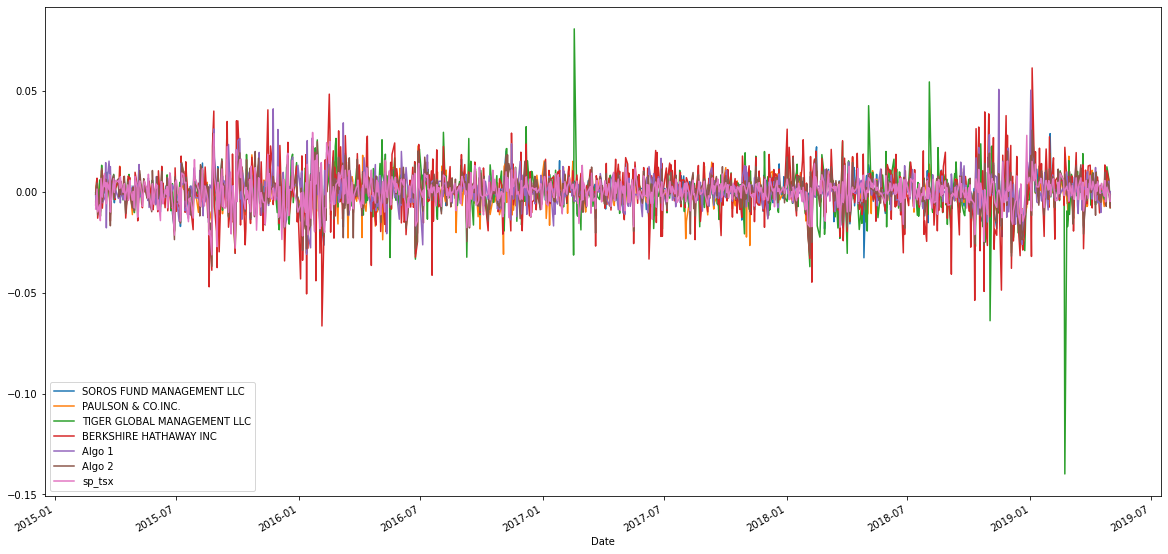

In [14]:
# Plot daily returns of all portfolios
data_combined.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

In [15]:
# Calculate cumulative returns of all portfolios

df_cum = (1+ data_combined).cumprod()
df_cum.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.991470
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.988128
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.989456
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.979589
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.973168


<AxesSubplot:xlabel='Date'>

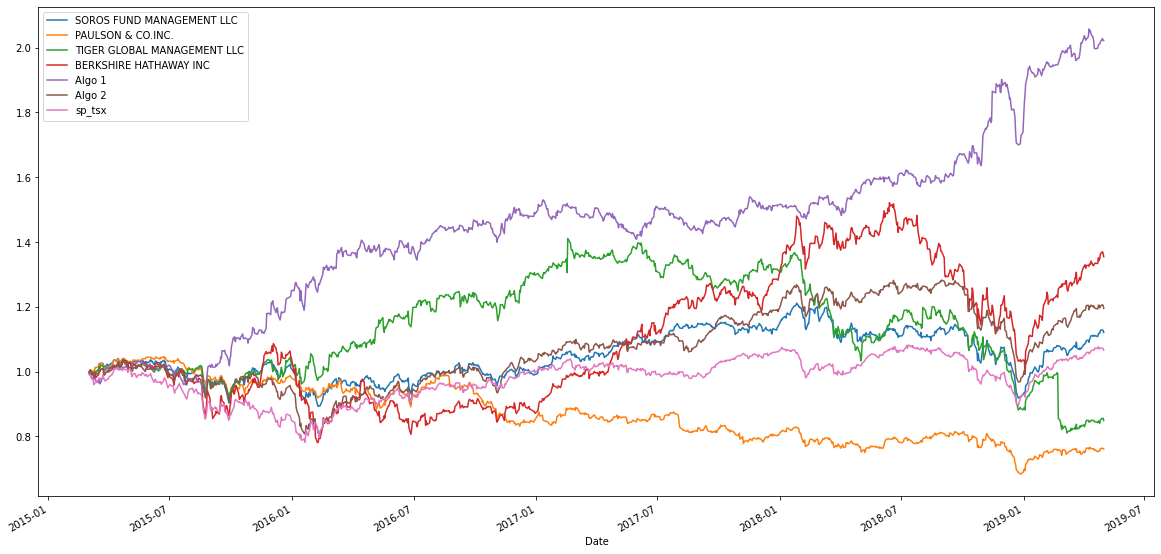

In [16]:
# Plot cumulative returns
df_cum.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

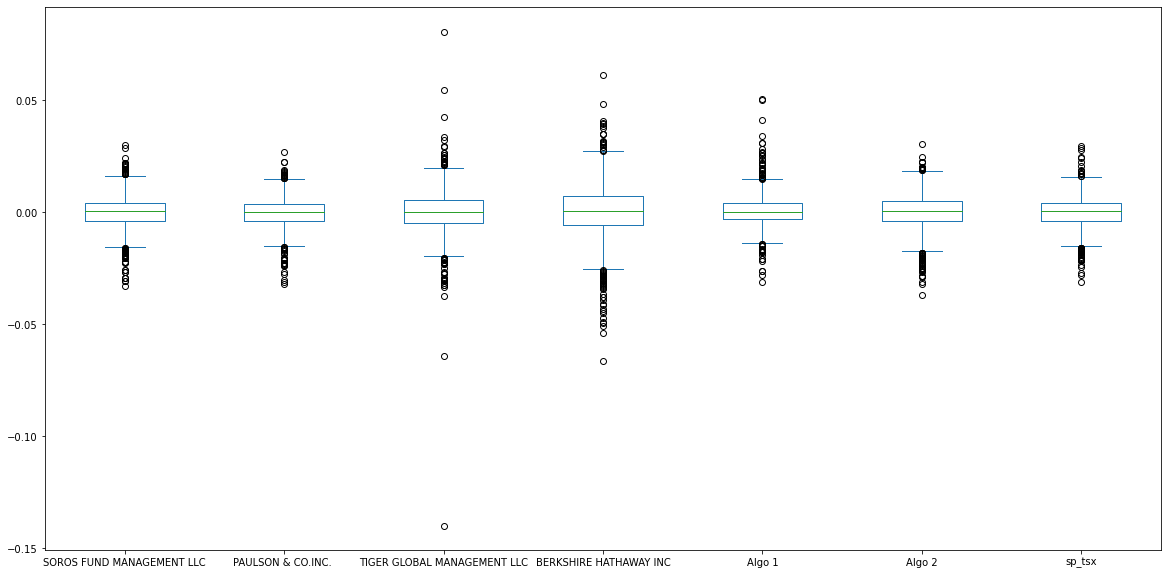

In [17]:
# Box plot to visually show risk
data_combined.plot(kind = "box", figsize = (20,10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
daily_std= pd.DataFrame(data_combined.std()).rename(columns = {0:"std"})
daily_std

,std
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
sp_tsx,0.007034


### Determine which portfolios are riskier than the S&P TSX 60

In [19]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_std = sp_tsx_daily_returns.std()
sp_std

sp_tsx    0.006637
dtype: float64

In [20]:
# Determine which portfolios are riskier than the S&P TSX 60
higher_std = daily_std[daily_std["std"] > daily_std.loc["sp_tsx", "std"]]
higher_std

,std
SOROS FUND MANAGEMENT LLC,0.007828
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326


**SOROS,TIGER,BERKSHIRE AND ALGO 1 AND 2 have higher votility than Sp**

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std*np.sqrt(252)
annualized_std

,std
SOROS FUND MANAGEMENT LLC,0.124259
PAULSON & CO.INC.,0.110841
TIGER GLOBAL MANAGEMENT LLC,0.172759
BERKSHIRE HATHAWAY INC,0.203599
Algo 1,0.120470
Algo 2,0.132177
sp_tsx,0.111664


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

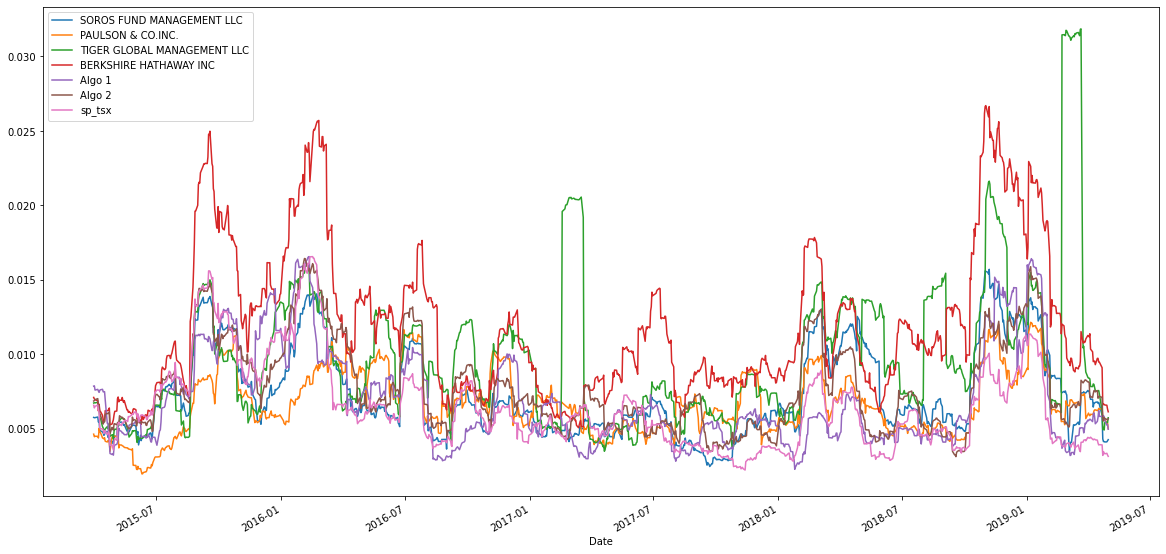

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
sp_tsx_rolling_21 = data_combined.rolling(window = 21).std()
                               
                              

# Plot the rolling standard deviation
sp_tsx_rolling_21.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

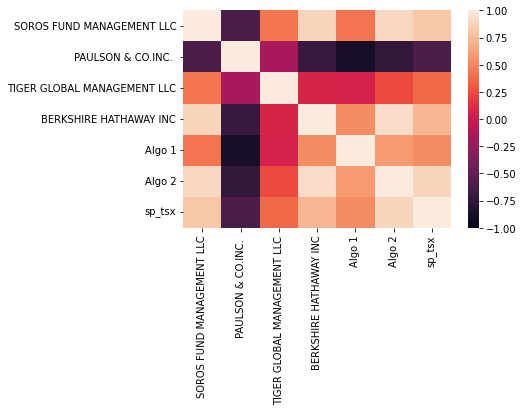

In [23]:
# Calculate the correlation
correlation_data = df_cum.corr()
correlation_data


# Display de correlation matrix
sns.heatmap(correlation_data, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Days Beta of BHI'}, xlabel='Date'>

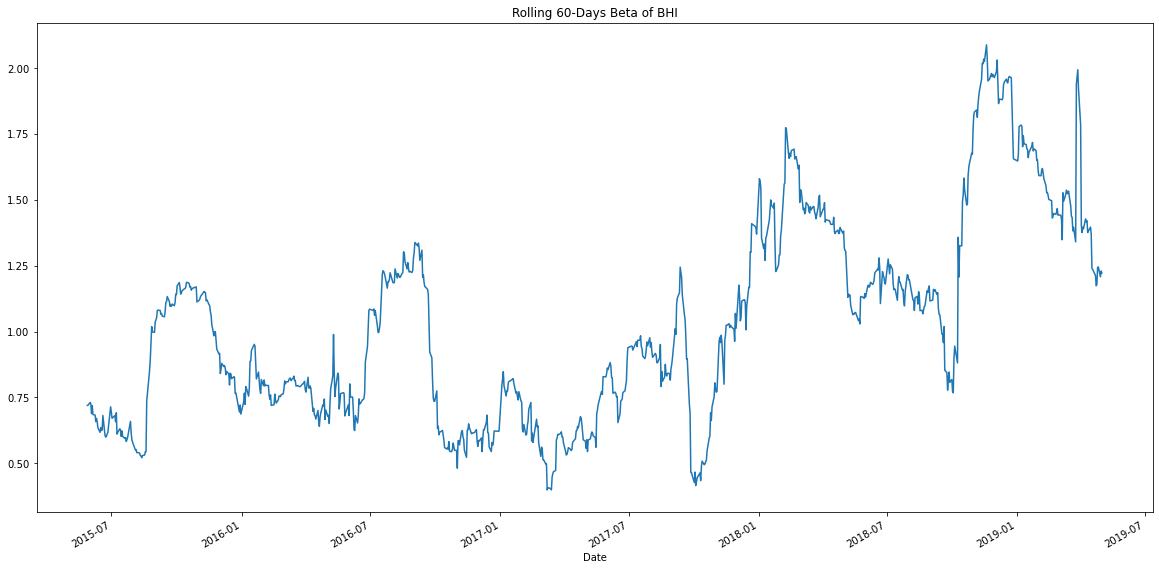

In [24]:
# Calculate covariance of a single portfolio,calculate variance of S&P TSX, computing beta, plot beta trend
rolling_covariance = data_combined['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(data_combined['sp_tsx'])
rolling_variance = data_combined['sp_tsx'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Days Beta of BHI')







## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

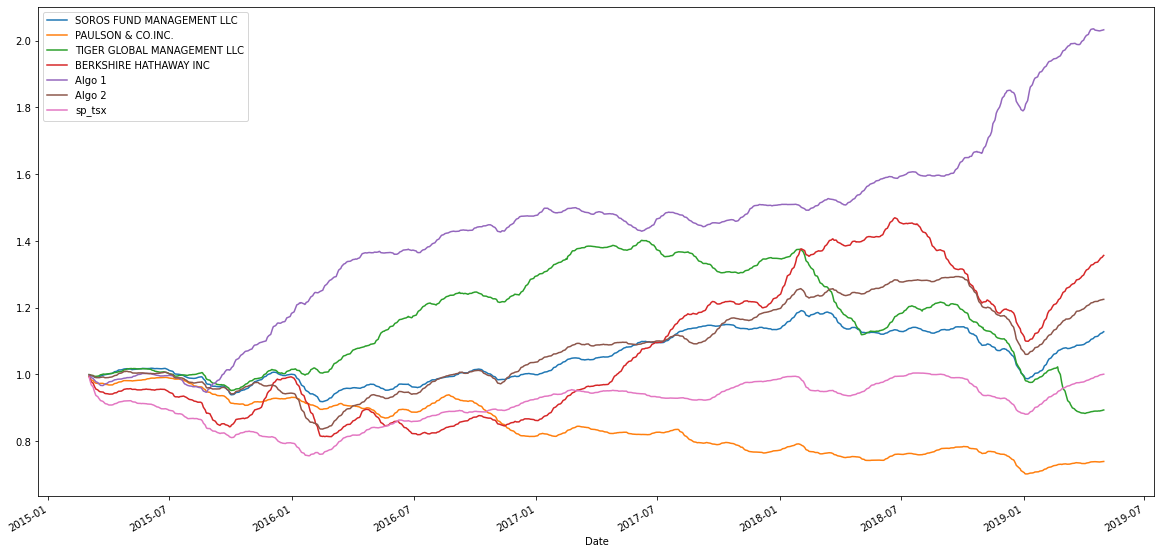

In [25]:
# Use `ewm` to calculate the rolling window

df_daily_ewm = data_combined.ewm(span = 21,adjust = False).mean()
(1+df_daily_ewm).cumprod().plot(figsize = (20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
sharpe_ratios = data_combined.mean()*252/(data_combined.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
sp_tsx                         0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

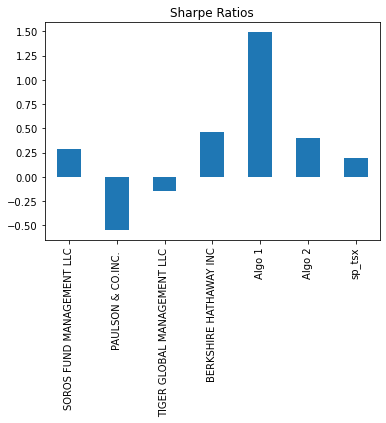

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Algo 1 outperfoms! Where Algo 2 lower than Algo 1 on the 3rd place


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Reading data from 1st stock

amazon_csv_path = Path("Resources/Amazon_historical.csv")
amazon_history = pd.read_csv(amazon_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
amazon_history["Close"] = amazon_history["Close"]

amazon_history.rename(columns = {"Close":"amzn"}, inplace = True)
amazon_history.dropna()


,amzn
Date,
2014-04-15,316.079987
2014-04-16,323.679993
2014-04-17,324.910004
2014-04-21,330.869995
2014-04-22,329.320007
...,...
2022-04-08,3089.209961
2022-04-11,3022.439941
2022-04-12,3015.750000


In [29]:
# Reading data from 2nd stock
FB_csv_path = Path("Resources/FB_historical.csv")
FB_history = pd.read_csv(FB_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)




FB_history.rename(columns = {"Close":"FB"}, inplace = True)
FB_history.head()

,FB
Date,
2014-04-15,59.090000
2014-04-16,59.720001
2014-04-17,58.939999
2014-04-21,61.240002
2014-04-22,63.029999


In [30]:
# Reading data from 3rd stock
Tesla_csv_path = Path("Resources/TSLA_historical.csv")
Tesla_history = pd.read_csv(Tesla_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
Tesla_history["Close"]=Tesla_history["Close"]


Tesla_history.rename(columns = {"Close":"TSLA"}, inplace = True)
Tesla_history.head()

,TSLA
Date,
2014-04-15,38.782001
2014-04-16,39.821999
2014-04-17,39.624001
2014-04-21,40.875999
2014-04-22,43.728001


In [31]:
# Combine all stocks in a single DataFrame
my_stocks = pd.concat((amazon_history, FB_history, Tesla_history), axis = 1, join= "inner")
my_stocks.sort_index(ascending = True, inplace = True)

my_stocks.head()

,amzn,FB,TSLA
Date,,,
2014-04-15,316.079987,59.090000,38.782001
2014-04-16,323.679993,59.720001,39.821999
2014-04-17,324.910004,58.939999,39.624001
2014-04-21,330.869995,61.240002,40.875999
2014-04-22,329.320007,63.029999,43.728001


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [32]:
# Set weights,# Calculate portfolio return

weights = [1/3, 1/3, 1/3]
my_portfolio = my_stocks.dot(weights)
my_portfolio_returns = my_portfolio.pct_change()
my_portfolio_returns.dropna(inplace = True)
my_portfolio_returns.head()

Date
2014-04-16    0.022394
2014-04-17    0.000595
2014-04-21    0.022462
2014-04-22    0.007141
2014-04-23   -0.019584
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [33]:
my_returns = pd.DataFrame(my_portfolio_returns, columns=['My Portfolio'])
my_returns.head()

,My Portfolio
Date,
2014-04-16,0.022394
2014-04-17,0.000595
2014-04-21,0.022462
2014-04-22,0.007141
2014-04-23,-0.019584


In [34]:
# Join your returns DataFrame to the original returns DataFrame


porto_returns = pd.concat([data_combined,my_returns ], axis="columns", join="inner")
porto_returns.rename(columns = {0:"my_portfolio"}, inplace = True)

porto_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx,My Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,-0.001493
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,-0.000028
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,0.010034
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.020209
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,-0.005412


In [35]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
porto_returns.dropna(inplace=True)
porto_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx,My Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,-0.001493
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,-0.000028
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,0.010034
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.020209
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,-0.005412


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [36]:
# Calculate the annualized `std`
porto_returns_std = porto_returns.std()
porto_returns_std.head()

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
dtype: float64

In [37]:
# Calculate the annualized standard deviation (252 trading days)
porto_returns_std_an = porto_returns_std * np.sqrt(252)
porto_returns_std_an.head()

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
dtype: float64

SOROS FUND MANAGEMENT LLC has higest risk

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Days Rolling Standard Deviation of All Portfolios'}, xlabel='Date'>

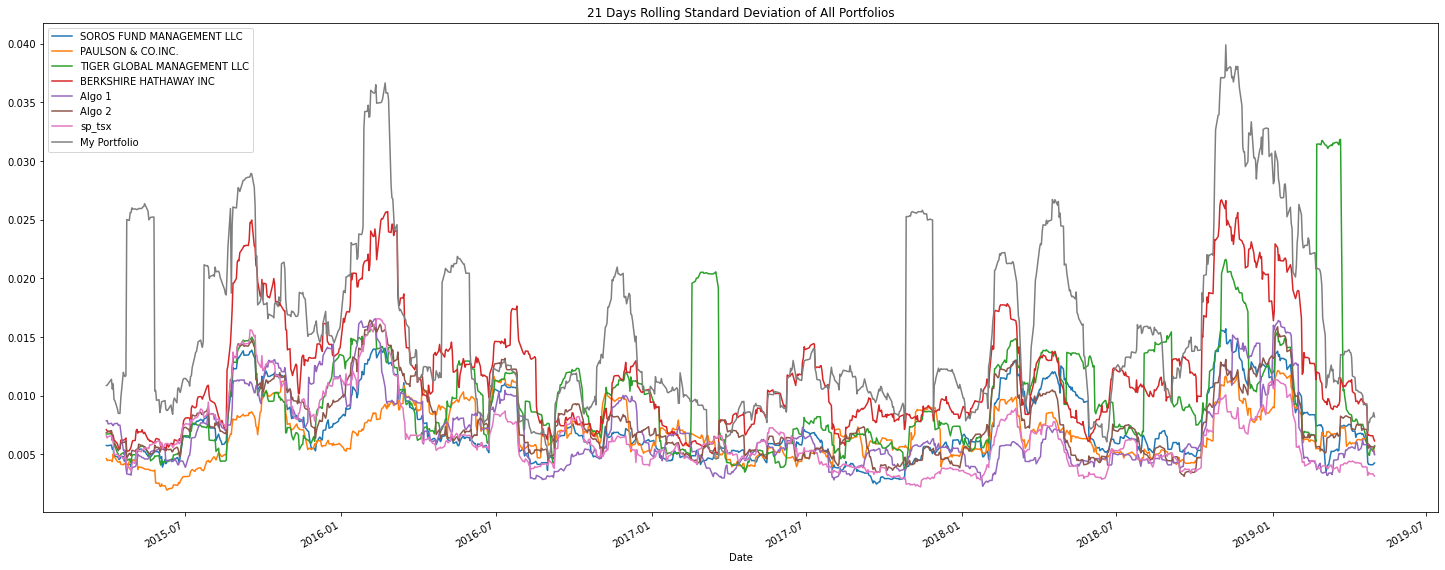

In [38]:
# Calculate rolling standard deviation
porto_returns_rolling_std = porto_returns.rolling(window=21).std() 

# Plot rolling standard deviation
porto_returns_rolling_std.plot(figsize=(25,10), title="21 Days Rolling Standard Deviation of All Portfolios")

### Calculate and plot the correlation

<AxesSubplot:>

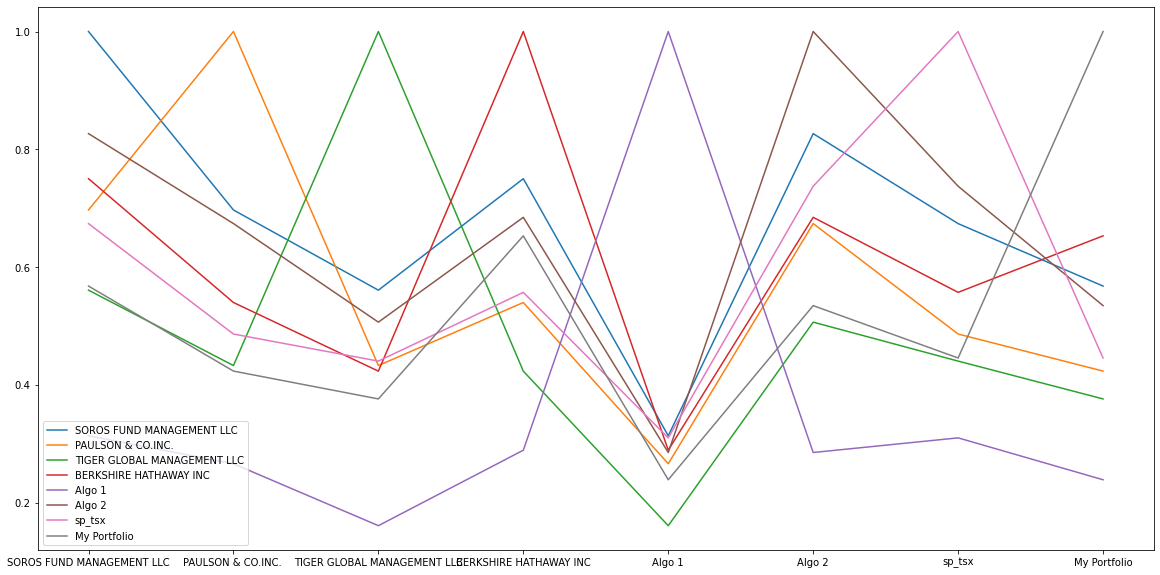

In [39]:
# Calculate and plot the correlation
porto_corr = porto_returns.corr()
porto_corr.plot(figsize=(20,10))

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:>

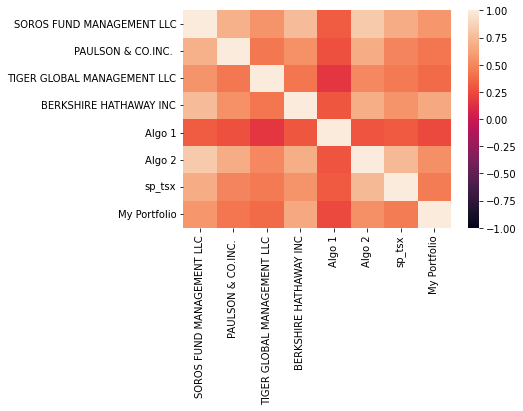

In [40]:
sns.heatmap(porto_corr
            , vmin=-1, vmax=1)

<AxesSubplot:title={'center':'Rolling 30Days Beta of My Portfolio'}, xlabel='Date'>

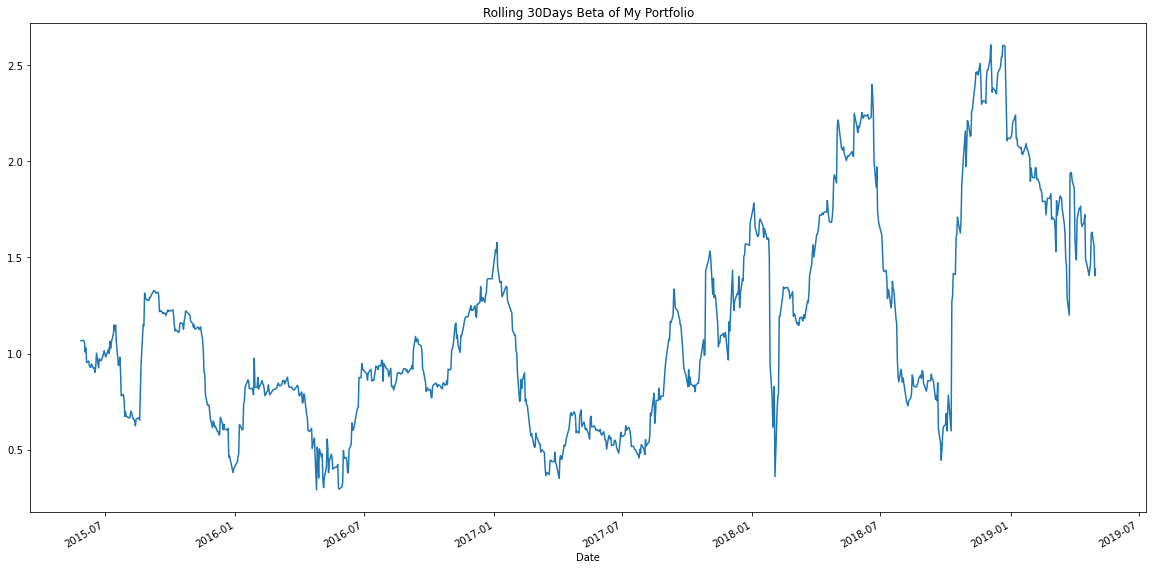

In [41]:
# Calculate and plot Beta
rolling_cons_covariance = porto_returns['My Portfolio'].rolling(window=60).cov(data_combined['sp_tsx'])
rolling_cons_variance = porto_returns['sp_tsx'].rolling(window=60).var()

# Calculate 60-day rolling beta of My Portfolio and plot the data
rolling_porto_beta = rolling_cons_covariance / rolling_cons_variance
rolling_porto_beta.plot(figsize=(20, 10), title='Rolling 30Days Beta of My Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (porto_returns.mean() * 252) / (porto_returns.std() * np.sqrt(252))
sharpe_ratios.sort_values(ascending=False, inplace=True)
sharpe_ratios.head()

Algo 1                       1.491514
My Portfolio                 1.273881
BERKSHIRE HATHAWAY INC       0.467045
Algo 2                       0.396817
SOROS FUND MANAGEMENT LLC    0.286709
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios of all portfolios'}>

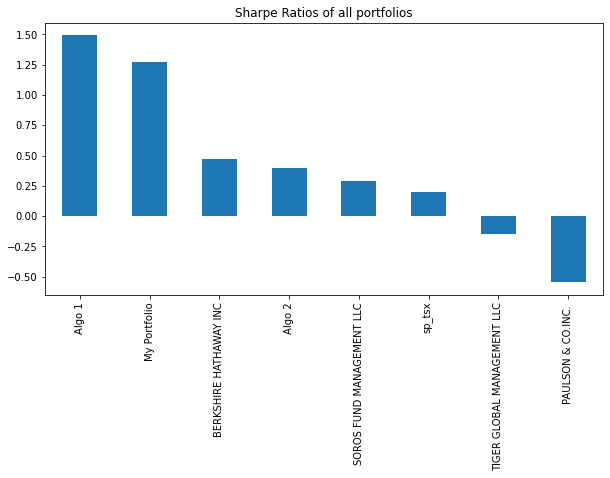

In [43]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios of all portfolios", figsize=(10,5))

### How does your portfolio do?

Write your answer here!

My Portofolio is doing better beating most of the portofolios but Algo_1 still doing
better